In [1]:
from polarUtilities import *
from IPython.display import Math, Latex

In [2]:

f=sym.Function('f')(theta)
phi=r**3*f
phi

r**3*f(theta)

In [3]:
polarbiharmonic(phi)

(9*f(theta) + 10*Derivative(f(theta), (theta, 2)) + Derivative(f(theta), (theta, 4)))/r

In [4]:
eq = sym.Eq(polarbiharmonic(phi),0)
sym.dsolve(eq)

Eq(f(theta), C1*exp(-3*I*theta) + C2*exp(-I*theta) + C3*exp(I*theta) + C4*exp(3*I*theta))

In [5]:
A, B, C, D = sym.symbols('A, B, C, D')
fnew = A*sym.cos(theta)**3 + B*sym.sin(theta)**3 + C*sym.cos(theta) + D*sym.sin(theta)
display(Math(r'f(\theta) = {}'.format(sym.latex(fnew))))

<IPython.core.display.Math object>

In [6]:
phi=r**3*(fnew)
display(Math(r'\phi = {}'.format(sym.latex(phi))))

<IPython.core.display.Math object>

In [7]:

sigmarr1 = sigma_rr(phi).simplify()
sigmatt1 = sigma_tt(phi).simplify()
sigmart = sigma_rt(phi).simplify()

display(Math(r'\sigma_{{rr}}^\rm{{1}} = {}'.format(sym.latex(sigmarr1))))
display(Math(r'\sigma_{{\theta\theta}}^\rm{{1}} = {}'.format(sym.latex(sigmatt1))))
display(Math(r'\sigma_{{r\theta}} = {}'.format(sym.latex(sigmart))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [8]:
rhoc,g=sym.symbols('rho_c,g')
V = -rhoc*g*r*sym.cos(theta)
display(V)

-g*r*rho_c*cos(theta)

In [9]:
sigmarr=sigmarr1+V
sigmatt=sigmatt1+V
display(Math(r'\sigma_{{rr}} = {}'.format(sym.latex(sigmarr))))
display(Math(r'\sigma_{{\theta\theta}} = {}'.format(sym.latex(sigmatt))))
display(Math(r'\sigma_{{r\theta}} = {}'.format(sym.latex(sigmart))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [10]:
rho,alpha = sym.symbols('rho,alpha')

In [11]:
lhs1=(sigmart.subs(theta,0))*(1/(2*r))
rhs1=0
eq1=sym.Eq(lhs1,rhs1).simplify()
display(eq1)

lhs2=(sigmatt.subs(theta,0))*1/r
rhs2=-rho*g*r*1/r
eq2=sym.Eq(lhs2,rhs2).simplify()
display(eq2)

lhs3 = (sigmart.subs(theta,alpha))*(1/(2*r))
rhs3 = 0
eq3 = sym.Eq(lhs3,rhs3).expand().simplify()
display(eq3)

lhs4 = (sigmatt.subs(theta,alpha))*(1/r)
rhs4 = 0
eq4 = sym.Eq(lhs4,rhs4).simplify()
display(eq4)

Eq(D, 0)

Eq(g*rho, -6*A - 6*C + g*rho_c)

Eq(3*A*sin(alpha)**3 - 3*A*sin(alpha) + 3*B*sin(alpha)**2*cos(alpha) - C*sin(alpha) + D*cos(alpha), 0)

Eq(6*A*cos(alpha)**3 + 6*B*sin(alpha)**3 + 6*C*cos(alpha) + 6*D*sin(alpha) - g*rho_c*cos(alpha), 0)

In [12]:

soln, = sym.linsolve([eq1,eq2,eq3,eq4],(A,B,C,D))
Asoln = soln[0]
Bsoln = soln[1]
Csoln = soln[2]
Dsoln = soln[3]
display(Asoln,Bsoln,Csoln,Dsoln)

g*(-rho - 3*rho/tan(alpha)**2 + rho_c)/6

g*(2*rho/tan(alpha) - 2*rho*cos(alpha)/sin(alpha)**3 + rho_c/tan(alpha))/6

g*rho/(2*tan(alpha)**2)

0

In [13]:

lhs=(sigmarr.subs(theta,0))*(1/r)
rhs=0
eq=sym.Eq(lhs,rhs).simplify()
display(eq)

Eq(2*C - g*rho_c, 0)

In [14]:
eq5=eq.subs([(A,Asoln),(C,Csoln)]).simplify()
display(eq5)

Eq(g*(rho/tan(alpha)**2 - rho_c), 0)

In [15]:
eq6=eq5.subs([(g,9.81),(rho,1),(rhoc,2.3)]).expand().simplify()
display(eq6)

Eq(22.563 - 9.81/tan(alpha)**2, 0)

In [16]:
from sympy.solvers import solve

In [17]:
sol = solve(eq6,alpha)

In [18]:
alphadeg = (sol[1]*180/sym.pi).evalf()
display(alphadeg)

33.4000784085467

In [19]:
sigma_max1= ((sigmarr+sigmatt)/2)+(((sigmarr+sigmatt)/2)**2+sigmart**2)**0.5
sigma_max1

-g*r*rho_c*cos(theta) + 3*r*(A*cos(theta)**3 + B*sin(theta)**3 + C*cos(theta) + D*sin(theta)) + r*(3*A*sin(theta)**2*cos(theta) - 3*B*sin(theta)**3 + 3*B*sin(theta) + C*cos(theta) + D*sin(theta)) + (4*r**2*(-3*A*sin(theta)**3 + 3*A*sin(theta) - 3*B*sin(theta)**2*cos(theta) + C*sin(theta) - D*cos(theta))**2 + (-g*r*rho_c*cos(theta) + 3*r*(A*cos(theta)**3 + B*sin(theta)**3 + C*cos(theta) + D*sin(theta)) + r*(3*A*sin(theta)**2*cos(theta) - 3*B*sin(theta)**3 + 3*B*sin(theta) + C*cos(theta) + D*sin(theta)))**2)**0.5

In [20]:
sigma_max = sigma_max1.subs([(A,Asoln),(B,Bsoln),(C,Csoln),(D,Dsoln)])
sigma_max

-g*r*rho_c*cos(theta) + 3*r*(g*rho*cos(theta)/(2*tan(alpha)**2) + g*(-rho - 3*rho/tan(alpha)**2 + rho_c)*cos(theta)**3/6 + g*(2*rho/tan(alpha) - 2*rho*cos(alpha)/sin(alpha)**3 + rho_c/tan(alpha))*sin(theta)**3/6) + r*(g*rho*cos(theta)/(2*tan(alpha)**2) + g*(-rho - 3*rho/tan(alpha)**2 + rho_c)*sin(theta)**2*cos(theta)/2 - g*(2*rho/tan(alpha) - 2*rho*cos(alpha)/sin(alpha)**3 + rho_c/tan(alpha))*sin(theta)**3/2 + g*(2*rho/tan(alpha) - 2*rho*cos(alpha)/sin(alpha)**3 + rho_c/tan(alpha))*sin(theta)/2) + (4*r**2*(g*rho*sin(theta)/(2*tan(alpha)**2) - g*(-rho - 3*rho/tan(alpha)**2 + rho_c)*sin(theta)**3/2 + g*(-rho - 3*rho/tan(alpha)**2 + rho_c)*sin(theta)/2 - g*(2*rho/tan(alpha) - 2*rho*cos(alpha)/sin(alpha)**3 + rho_c/tan(alpha))*sin(theta)**2*cos(theta)/2)**2 + (-g*r*rho_c*cos(theta) + 3*r*(g*rho*cos(theta)/(2*tan(alpha)**2) + g*(-rho - 3*rho/tan(alpha)**2 + rho_c)*cos(theta)**3/6 + g*(2*rho/tan(alpha) - 2*rho*cos(alpha)/sin(alpha)**3 + rho_c/tan(alpha))*sin(theta)**3/6) + r*(g*rho*cos(theta

In [52]:
sigma_max_soln = sigma_max.subs([(g,9.81),(rho,1),(rhoc,2.3),(r,10),(alpha,sym.pi/4)]).expand().simplify()
sigma_max_soln

93.9662821175767*(0.381471389645776*(1 - cos(2*theta))**3 - 0.138964577656676*(1 - cos(2*theta))**2*sin(2*theta) - 0.623978201634877*(1 - cos(2*theta))**2 - 0.0735694822888281*sin(2*theta) - 0.0572207084468666*sin(4*theta) + 0.44141689373297*cos(2*theta) + 1)**0.5 + 14.715*sin(theta) + 5.32907051820075e-16*sin(3*theta) - 112.815*cos(theta) + 7.105427357601e-15*cos(3*theta)

In [70]:

def stress_pr(angle):
    return sigma_max_soln.subs(theta,angle).evalf()
stress_pr(30)

70.5978778223732

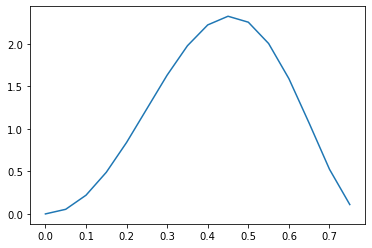

In [79]:
import matplotlib.pyplot as plt

import numpy as np
x=np.arange(0,sym.pi/4,0.05)
p=np.vectorize(stress_pr)
y=p(x)
plt.plot(x,y)



In [82]:
sigma_max_soln2 = sigma_max.subs([(g,9.81),(rho,1),(rhoc,2.3),(r,10),(alpha,sol[1])]).expand().simplify()
sigma_max_soln2

261.227516848341*(-0.338339767659139*(cos(2*theta) - 1)**3 + 0.688683947463352*(cos(2*theta) - 1)**2*sin(2*theta) - 0.874116381969785*(cos(2*theta) - 1)**2 - 0.688683947463352*sin(2*theta) + 0.405831611898047*sin(4*theta) - 0.964743420240803*cos(2*theta) + 1)**0.5 - 171.092418644135*sin(theta) - 6.19615062238621e-15*sin(3*theta) - 49.0499999999999*cos(theta) + 1.4210854715202e-14*cos(3*theta)

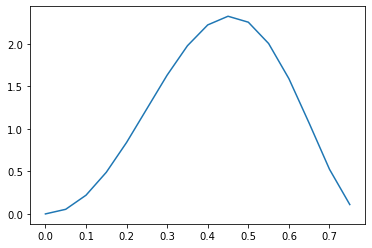

In [83]:
x=np.arange(0,sym.pi/4,0.05)
p=np.vectorize(stress_pr)
y=p(x)
plt.plot(x,y)